WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group 1 mean, Group 2 mean, nu - 2.5, Group 1 log sigma, Group 2 log sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 22 seconds.


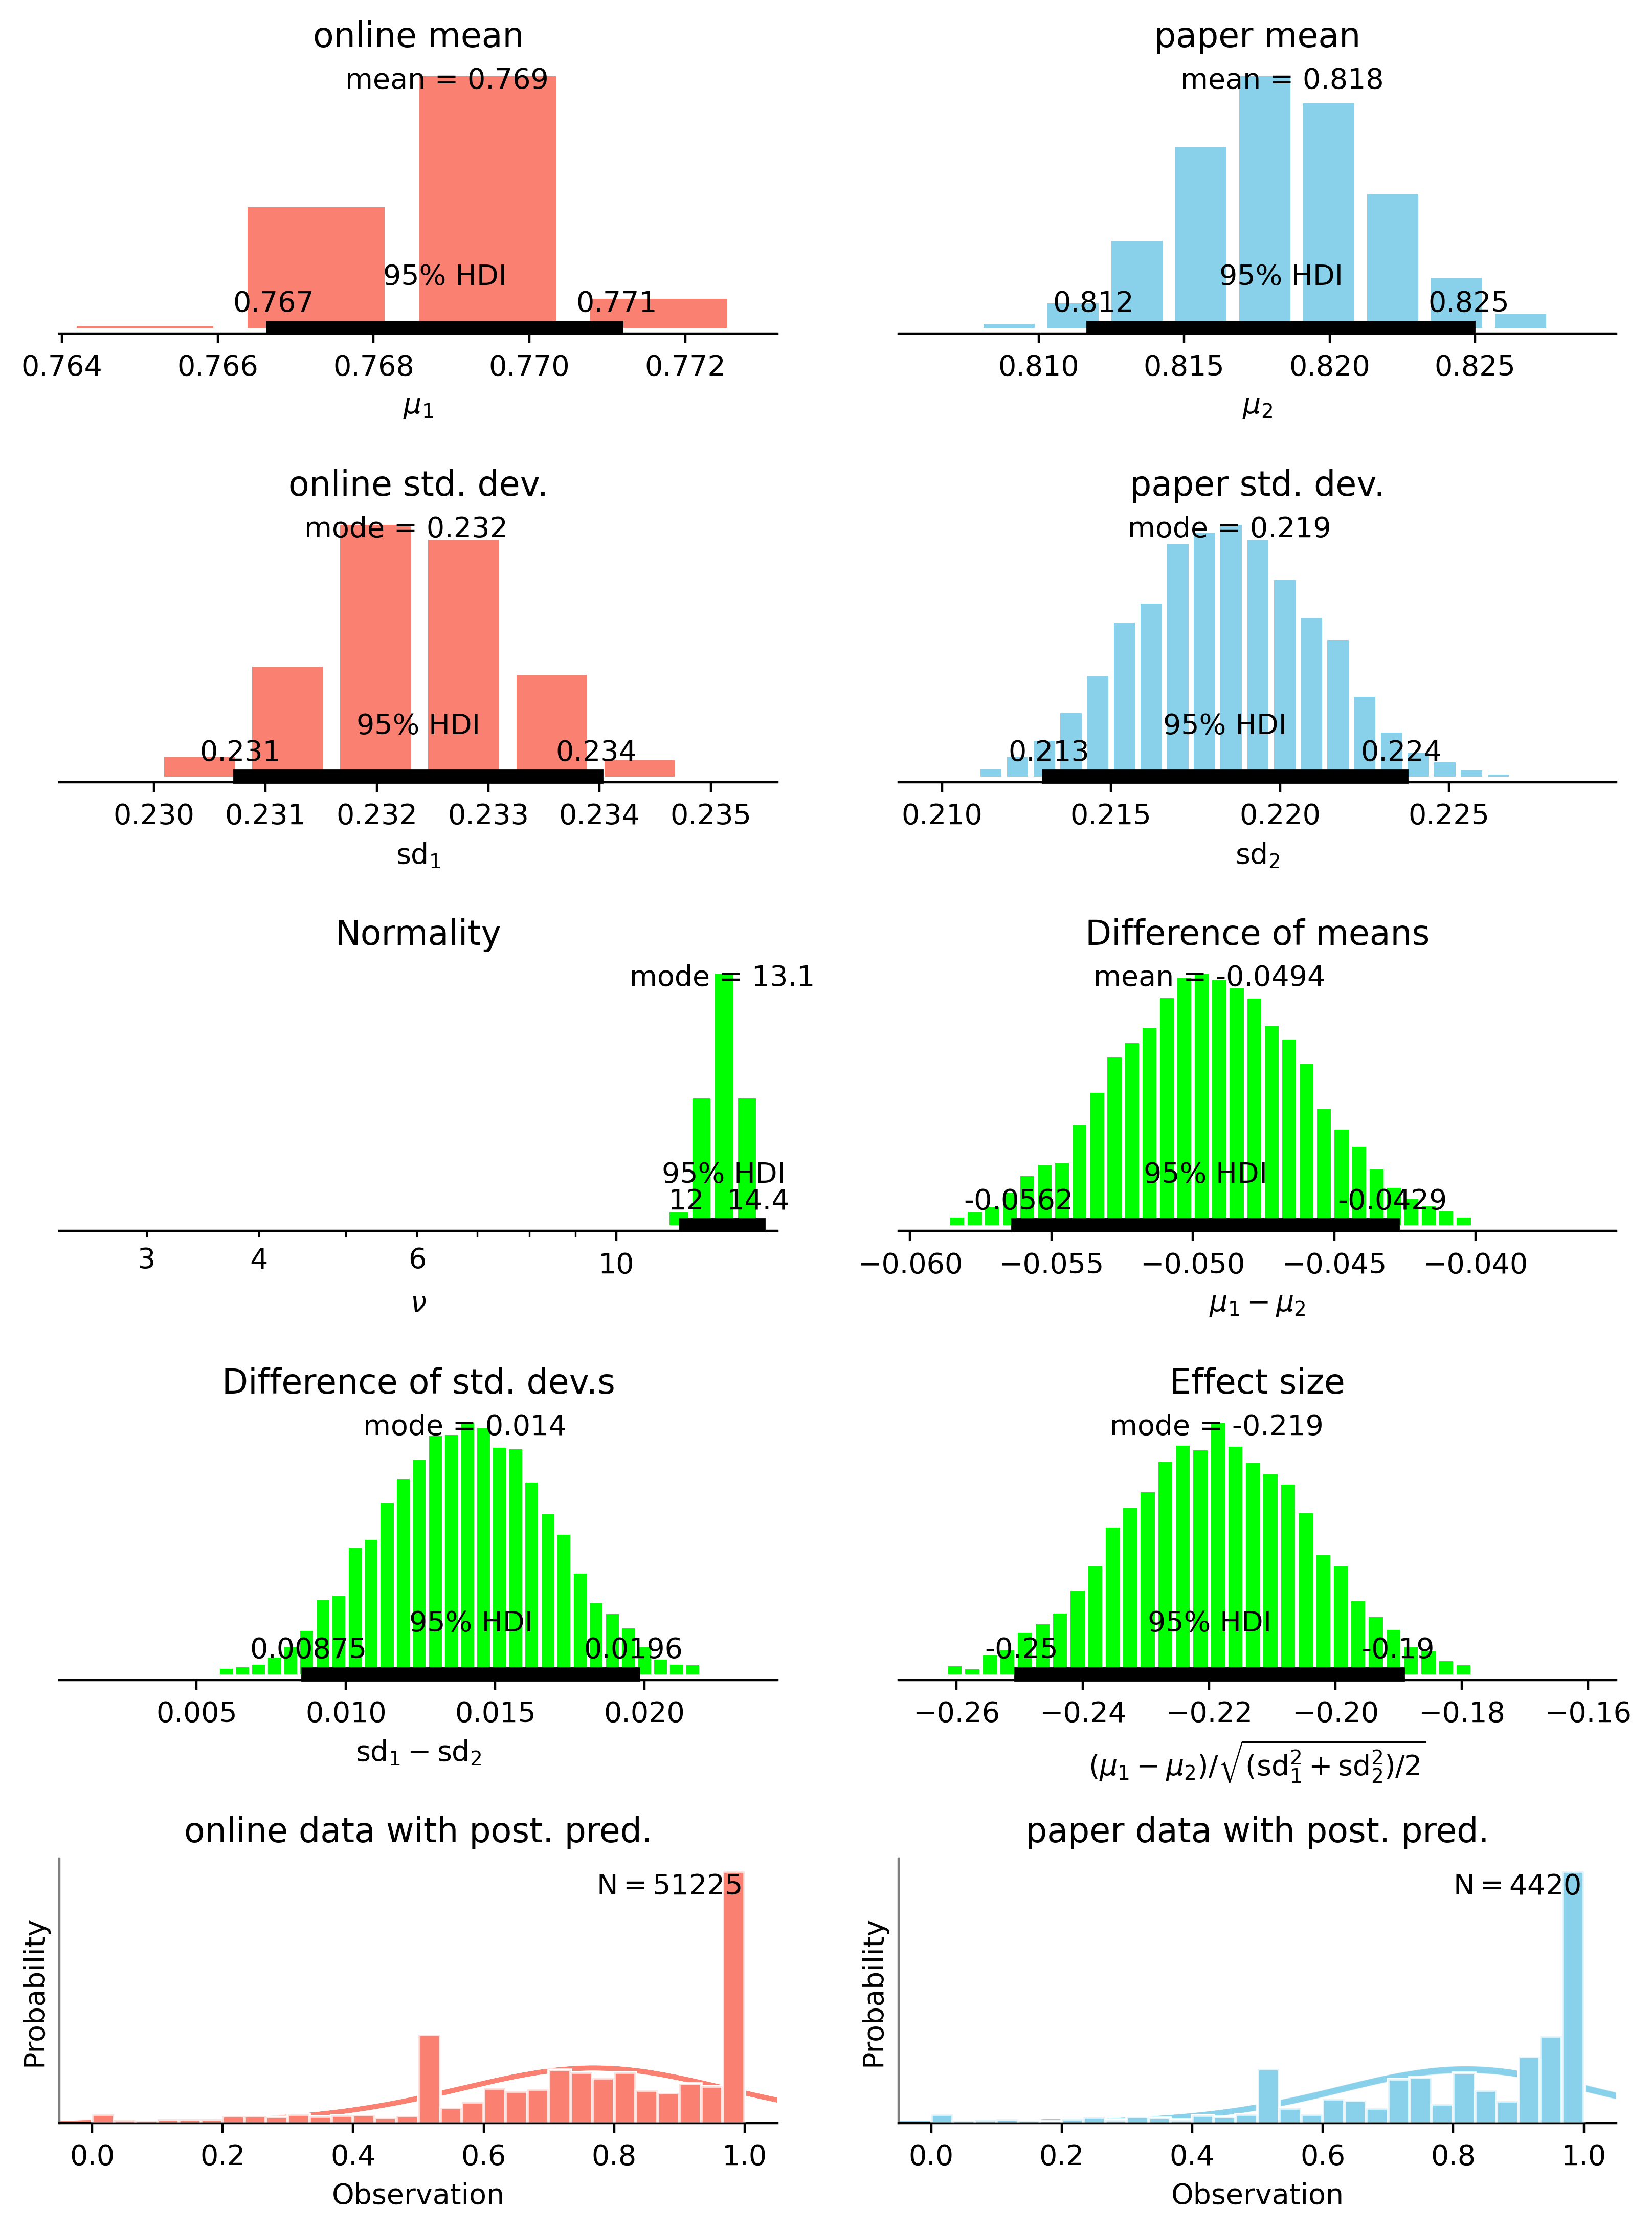

In [1]:
from bayes_test import BayesianHypothesisTestStudentT
import pandas as pd
import numpy as np

draws = 2000

online = np.load('online_distinctiveness.npy')

paper = np.load('paper_distinctiveness.npy')


df1 = pd.DataFrame({'value' : paper})
df2 = pd.DataFrame({'value' : online})
df1['del_type'] = 'paper'
df2['del_type'] = 'online'

df = pd.concat([df1,df2])

study_test = BayesianHypothesisTestStudentT(df=df,
                                   group1_name='online',
                                   group2_name='paper',
                                   value_column='value',
                                   category_column='del_type')
study_test.run_model(draws)
study_test.plot_results()

In [2]:
# This will computer various effect sizes
study_test.cliff_delta()
study_test.non_overlap_effect_size()
study_test.divergence_effect_size()
study_test.value_storage

Sampling: [Group 1 data, Group 2 data]


{'Group 1 mean': {'mean': 0.768942074690077,
  'hdi_min': 0.7667129952528426,
  'hdi_max': 0.7711168887732734},
 'Group 2 mean': {'mean': 0.8183653519190865,
  'hdi_min': 0.8118814855877214,
  'hdi_max': 0.8247785319955283},
 'Group 1 SD': {'mode': 0.23226425095122505,
  'hdi_min': 0.23077468260102504,
  'hdi_max': 0.23397136470992916},
 'Group 2 SD': {'mode': 0.21850196650894635,
  'hdi_min': 0.21316367160420052,
  'hdi_max': 0.223590140514905},
 'Normality': {'mode': 13.122162936770712,
  'hdi_min': 11.961436382488587,
  'hdi_max': 14.380333156970094},
 'Difference of means': {'mean': -0.049416205594025694,
  'hdi_min': -0.05617035323709296,
  'hdi_max': -0.04293686731040547},
 'Difference of SDs': {'mode': 0.013981151951466528,
  'hdi_min': 0.008751091168081704,
  'hdi_max': 0.01962873653739705},
 'Effect size': {'mode': -0.21878426887038438,
  'hdi_min': -0.2497248103683245,
  'hdi_max': -0.19017188607579905},
 'cliff_delta': {'cliff_delta': 0.5639833928},
 'non_overlap_effect_size